# 02: Understanding the data

This notebook contains all of the information necessary for understanding the data and plotting light curves. In the following notebook I will explain the process of fitting light curves to the data.

In [127]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import norm
np.random.seed(42)
import seaborn as sns
%matplotlib inline  

In [128]:
sns.set_theme()

# LINEAR data

### A bit about LINEAR

bla bla bla (read research papers)

## Downloading the data

We import all of the necessary libraries in order to download the LINEAR data

In [4]:
from astroML.utils.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample
import numpy as np
import pandas as pd

In [2]:
data = fetch_LINEAR_sample(data_home='/Users/emadonev/Library/Mobile Documents/com~apple~CloudDocs/PROJECTS/var_stars') # fetching the data from astroML data library

[=========================================]  303.4kb / 303.4kb   
[=========================================]  16.05Mb / 16.05Mb   


Explain why is it like this that we are accessing the data...

In [20]:
c = 0
for i in data.ids:
    light_curve = data.get_light_curve(i)
    c += 2
    print(light_curve[:2])
print(c)

[[5.26514326e+04 1.57560000e+01 3.50000000e-02]
 [5.26514478e+04 1.57750000e+01 3.30000000e-02]]
[[5.26524776e+04 1.65340000e+01 5.90000000e-02]
 [5.26524924e+04 1.66480000e+01 6.40000000e-02]]
[[5.26374598e+04 1.54500000e+01 4.48000000e-01]
 [5.26524566e+04 1.54000000e+01 1.80000000e-02]]
[[5.26524564e+04 1.48020000e+01 1.10000000e-02]
 [5.26524716e+04 1.48010000e+01 1.10000000e-02]]
[[5.26524570e+04 1.38490000e+01 6.00000000e-03]
 [5.26524722e+04 1.38090000e+01 6.00000000e-03]]
[[5.26524571e+04 1.57110000e+01 2.60000000e-02]
 [5.26524723e+04 1.57250000e+01 2.60000000e-02]]
[[5.26644199e+04 1.60240000e+01 8.90000000e-02]
 [5.27822170e+04 1.60180000e+01 1.26000000e-01]]
[[5.26534613e+04 1.54790000e+01 2.00000000e-02]
 [5.26534766e+04 1.54890000e+01 2.20000000e-02]]
[[5.26534613e+04 1.50940000e+01 1.30000000e-02]
 [5.26534766e+04 1.51550000e+01 1.50000000e-02]]
[[5.26534612e+04 1.57050000e+01 2.40000000e-02]
 [5.26534765e+04 1.53540000e+01 1.80000000e-02]]
[[5.26534612e+04 1.60910000e+0

Our data contains 3 columns: `time`, `magnitude` and `magnitude_error`. In order to create lists with these values for every light curve, we use `.T` or we **transpose** the dataset. 

## Descriptive statistics of light curves

Before we start with the data processing, it is very important to look at the descriptive statistics of each light curve! This gives us information on the amount of flux the stars have, different values which we could graph and visualize for better understanding of the data.

In [132]:
descriptive_stats_mag = pd.DataFrame() # creating an empty DataFrame where all of the stats will go

#### Creating a descriptive statistics table for Magnitude values

In [133]:
for i in data.ids: # looping over the id's of the dataset
    light_curve = data.get_light_curve(i) # getting the light curve information
    df = pd.DataFrame(light_curve[1], columns=[i])
    dt = df.agg([np.mean, np.median, np.var, np.std, np.min, np.max])
    dt = dt.transpose()
    descriptive_stats_mag = pd.concat([descriptive_stats_mag, dt], axis=0)
descriptive_stats_mag

,mean,median,var,std,min,max
10003298,17555.751933,15.775,9.237810e+08,30393.765203,0.033,52651.447800
10004892,17556.401476,16.648,9.238018e+08,30394.107468,0.064,52652.492427
10013411,17555.958186,15.400,9.238232e+08,30394.460148,0.018,52652.456559
10021274,17555.761192,14.801,9.238344e+08,30394.643682,0.011,52652.471577
10022663,17555.429060,13.809,9.238519e+08,30394.931723,0.006,52652.472179
...,...,...,...,...,...,...
9983476,17554.912538,16.250,9.236658e+08,30391.870578,0.067,52648.420613
9983939,17554.582082,15.297,9.236832e+08,30392.157191,0.028,52648.421246
9984569,17555.178124,16.983,9.236519e+08,30391.641322,0.130,52648.421372
9987252,17555.045457,16.626,9.236588e+08,30391.756171,0.089,52648.421372


#### Creating a descriptive statistics table for Error values

In [134]:
descriptive_stats_error = pd.DataFrame() # creating an empty DataFrame where all of the stats will go

In [136]:
for i in data.ids: # looping over the id's of the dataset
    light_curve = data.get_light_curve(i) # getting the light curve information
    df = pd.DataFrame(light_curve[2], columns=[i])
    dt = df.agg([np.mean, np.median, np.var, np.std, np.min, np.max])
    dt = dt.transpose()
    descriptive_stats_error = pd.concat([descriptive_stats_error, dt], axis=0)

In [137]:
descriptive_stats_mag.index.name='index'
descriptive_stats_error.index.name='index'

## Analyzing descriptive statistics of light curves

### Magnitude values

In [157]:
columns = ['mean', 'median', 'var', 'std', 'min', 'max']

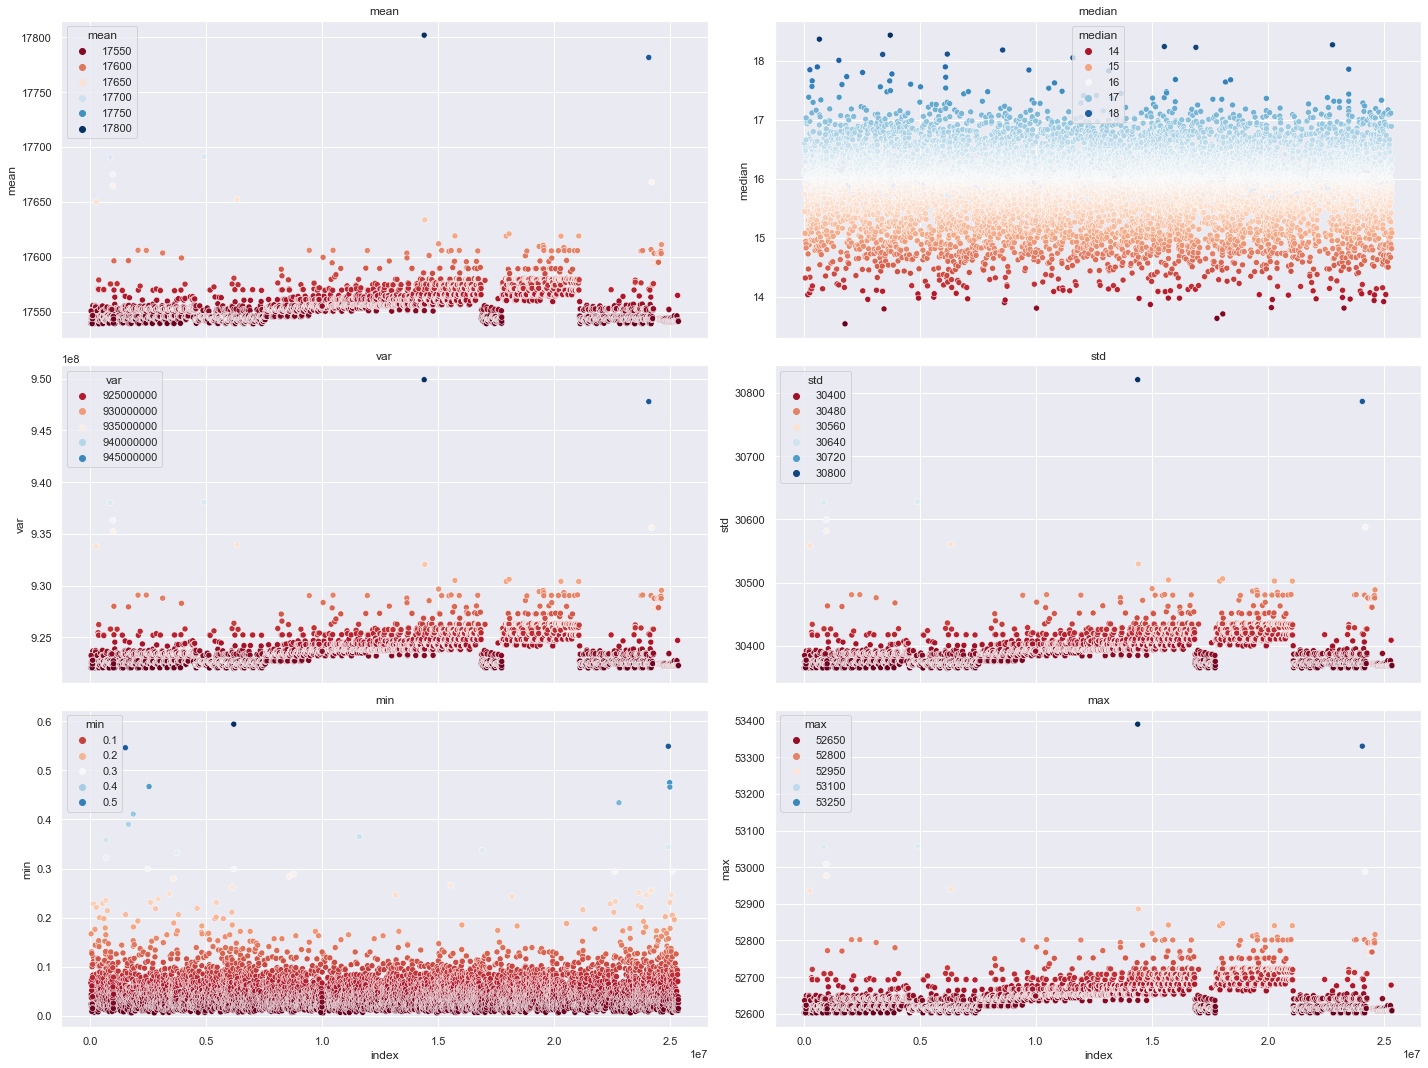

In [164]:
fig, ax = plt.subplots(3,2, sharex=True, figsize=(20,15))
ax = ax.flatten()
for i in range(len(columns)):
    ax[i].set_title(columns[i])
    sns.scatterplot(
        data=descriptive_stats_mag,
        x='index',
        y=columns[i],
        palette='RdBu',
        hue=columns[i],
       ax=ax[i])
plt.tight_layout()
plt.show()

## Error values

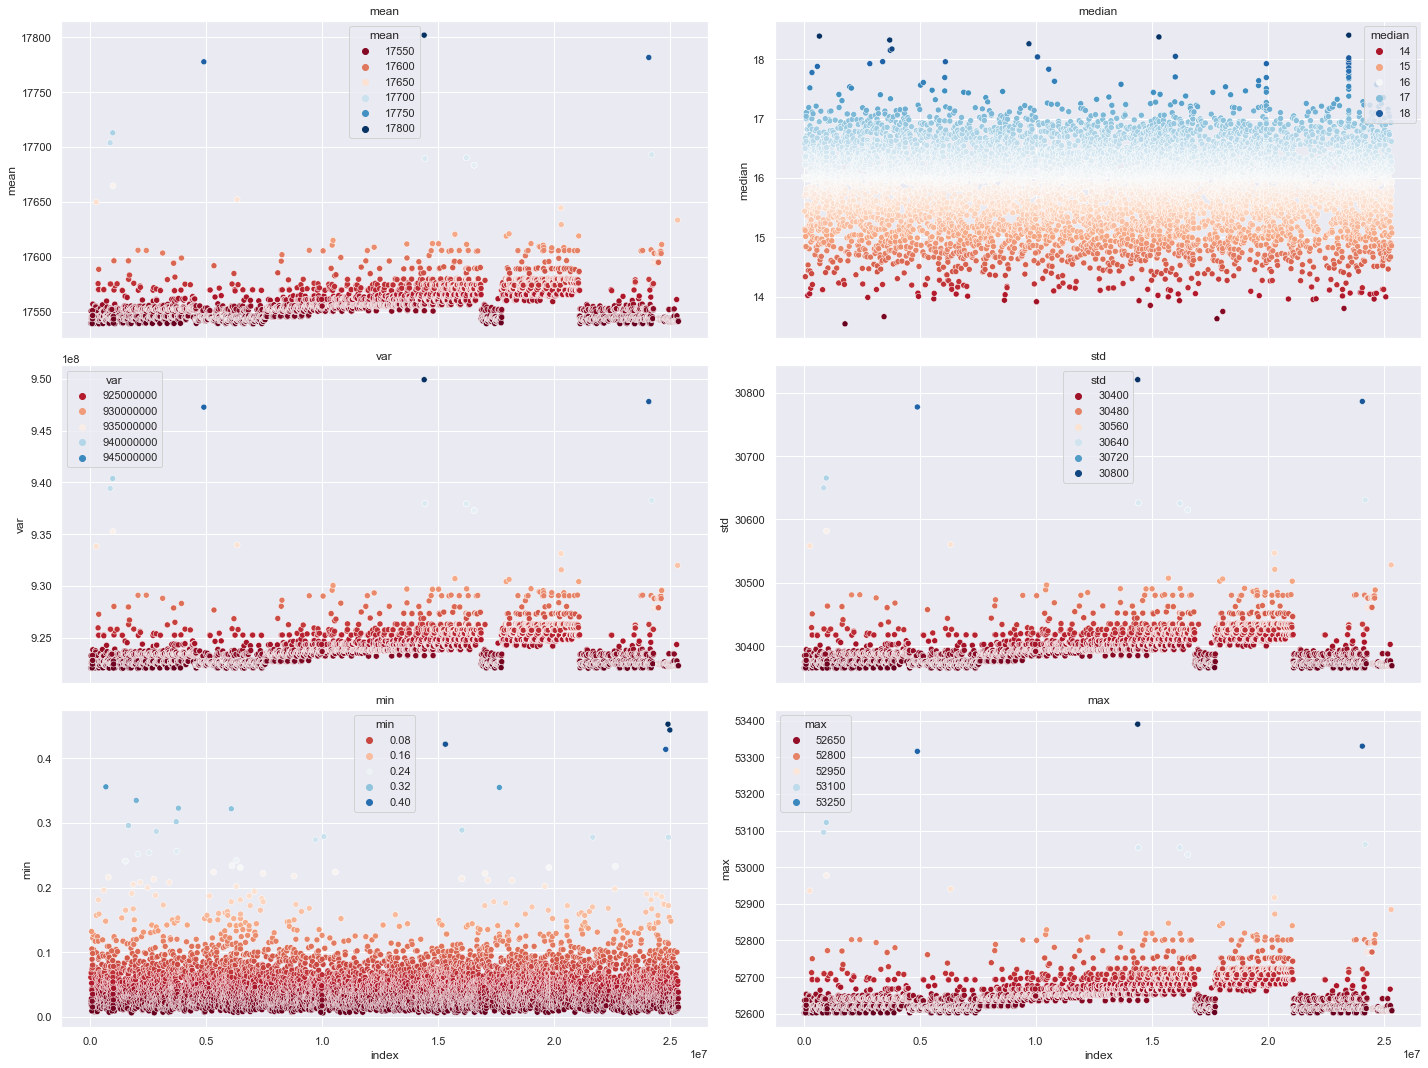

In [165]:
fig, ax = plt.subplots(3,2, sharex=True, figsize=(20,15))
ax = ax.flatten()
for i in range(len(columns)):
    ax[i].set_title(columns[i])
    sns.scatterplot(
        data=descriptive_stats_error,
        x='index',
        y=columns[i],
        palette='RdBu',
        hue=columns[i],
       ax=ax[i])
plt.tight_layout()
plt.show()

# Plotting light curves

After understanding the descriptive statistics of the data, its time to look at how the data looks like in the form of light curves. 